In [1]:
!pip install rdkit-pypi
!pip install scikit-learn

In [2]:
# import modules
# https://www.rdkit.org/
# https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np


In [3]:
# convert excel file to csv
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'
dataset = pd.read_csv(url)
dataset.shape

(1117, 2)

In [4]:
# see first five rows of dataframe
dataset.head()

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77
1,Cc1occc1C(=O)Nc1ccccc1,-3.30
2,CC(C)=CCCC(C)=CC=O,-2.06
3,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,-7.87
4,c1ccsc1,-1.33


In [5]:
# split training, validation, and test set into 8:1:1 ratio
from sklearn.model_selection import train_test_split
train, temp = train_test_split(dataset, test_size=0.2, random_state=2023)
test, val = train_test_split(temp, test_size=0.5, random_state=2023)

# verify length of each set
print("Training set length: ", len(train))
print("Validation set length: ", len(val))
print("Test set length: ", len(test))

Training set length:  893
Validation set length:  112
Test set length:  112


In [7]:
# check for duplicates and remove them
duplicates_smiles = dataset[dataset['smiles'].duplicated()]['smiles'].values
len(duplicates_smiles)

0

In [9]:
dataset_new = dataset.drop_duplicates(subset=['smiles'])
dataset_new

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.770
1,Cc1occc1C(=O)Nc1ccccc1,-3.300
2,CC(C)=CCCC(C)=CC=O,-2.060
3,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,-7.870
4,c1ccsc1,-1.330
...,...,...
1112,FC(F)(F)C(Cl)Br,-1.710
1113,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1114,CCSCCSP(=S)(OC)OC,-3.091
1115,CCC(C)C,-3.180


In [11]:
# calculate molecular descriptors using rdkit
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    # define empty list for molecular descriptors
    Mol_descriptors = []

    # iterate over each molecule
    for mol in mols:
        # add hydrogens to each molecule
        mol = Chem.AddHs(mol)
        # calculate all descriptors
        desc = calc.CalcDescriptors(mol)
        # append descriptors to list
        Mol_descriptors.append(desc)
    return Mol_descriptors, desc_names

# call function
Mol_descriptors, desc_names = RDkit_descriptors(dataset_new['smiles'])

In [12]:
# create dataframe to store molecular descriptors
df_desc = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.069684,-5.122500,10.069684,0.911295,0.217518,457.432,430.216,457.158411,178,0,...,0,0,0,0,0,0,0,0,0,0
1,12.547837,-2.999280,12.547837,0.099444,0.811283,201.225,190.137,201.078979,76,0,...,0,0,0,0,0,0,0,0,0,0
2,11.071016,-3.884051,11.071016,1.707414,0.343706,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,0,0,0
3,8.745488,-0.641794,8.745488,0.260568,0.291526,278.354,264.242,278.109550,102,0,...,0,0,0,0,0,0,0,0,0,0
4,6.980324,-0.134259,6.980324,0.004630,0.448927,84.143,80.111,84.003371,26,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,11.196181,-4.713735,11.196181,1.906057,0.523506,197.381,196.373,195.890224,44,0,...,0,0,0,0,0,0,0,0,0,0
1113,12.235172,-3.539125,12.235172,0.407085,0.293876,219.266,206.162,219.067762,80,0,...,1,0,0,0,0,0,0,0,0,0
1114,7.801921,-4.552936,7.801921,0.390035,0.506070,246.359,231.239,245.997179,74,0,...,1,0,0,0,0,0,0,0,0,0
1115,7.421875,-3.723958,7.421875,3.530208,0.444441,72.151,60.055,72.093900,32,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# develop linear regression model to predict experimental log solubility
# use five features: 'MolLogP', 'MolMR', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# define features and target
X = df_desc[['MolLogP', 'MolMR', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']]
y = dataset_new['logSolubility']

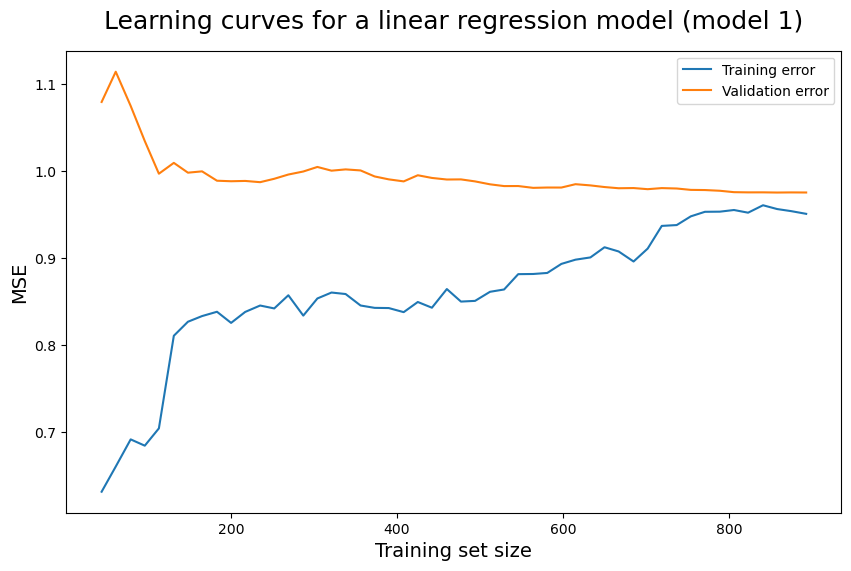

In [23]:
# plot learning curve with training set 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.05, 1.0, 50))
train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, test_errors, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a linear regression model (model 1)', fontsize=18, y=1.03)
plt.legend()
plt.show()

# Since there is a gap between the curves, the training set performs better than the validation set.
# This indicates that the model is overfitting.

In [24]:
# evaluate estimated bias and variance with all training data
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print('Estimated bias: ', np.mean(scores))
print('Estimated variance: ', np.var(scores, ddof=1))

Estimated bias:  -0.9751586700419145
Estimated variance:  0.015378184384763524


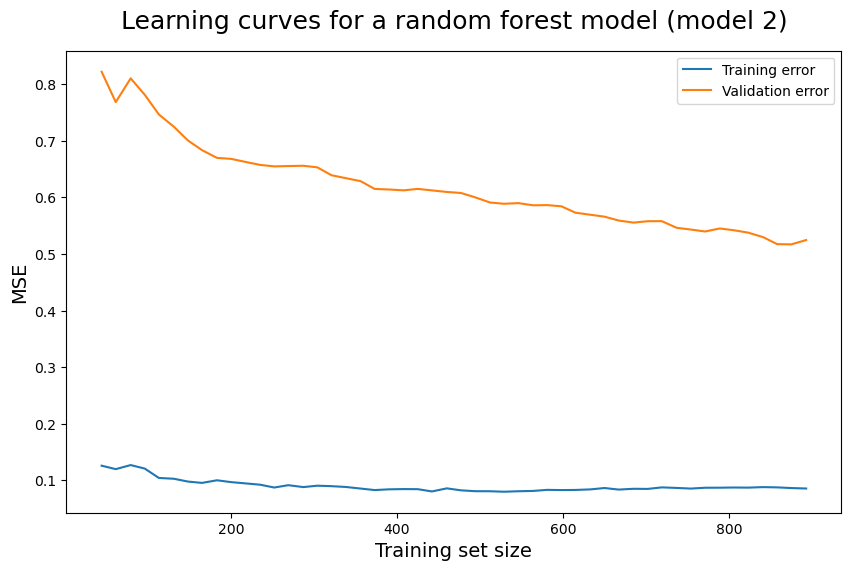

In [25]:
# repeat with a random forest model
from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.05, 1.0, 50))
train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, test_errors, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a random forest model (model 2)', fontsize=18, y=1.03)
plt.legend()
plt.show()